In [1]:
import cv2

import os
import sys

import matplotlib.pyplot as plt

In [2]:
images = []

for image in os.listdir("./test-cases"):
    images.append(cv2.cvtColor(cv2.imread("./test-cases/" + image), cv2.COLOR_BGR2GRAY))



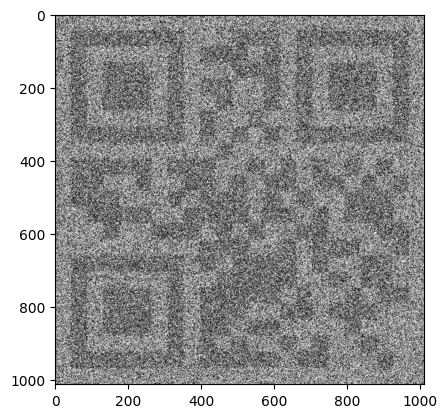

In [3]:
# fig, axes = plt.subplots(4, 4)
# def create_grid(images, axes):
#     for i in range(4):
#         for j in range(4):
#             axes[i, j].imshow(images[i * 4 + j])
# create_grid(images, axes)

# fig.tight_layout()
plt.imshow(images[11],cmap='gray')

In [4]:
image_11_median = cv2.medianBlur(images[11], 51)

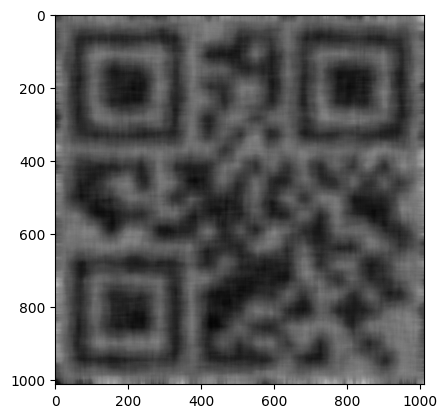

In [5]:
# fig, axes = plt.subplots(4, 4)
# create_grid(images, axes)

plt.imshow(image_11_median, cmap='gray')
plt.show()

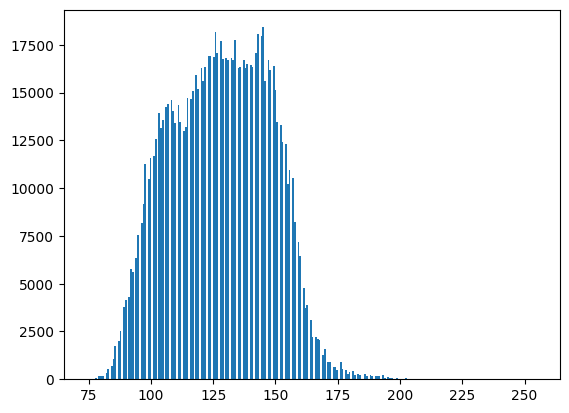

In [6]:
plt.hist(image_11_median.ravel(), bins=256);

In [7]:
import numpy as np

In [8]:
laplacian = np.array([[1,1,1],
                      [1,-7,1],
                      [1,1,1]])

image_11_median_sharpened = cv2.filter2D(src=image_11_median, ddepth=-1, kernel=laplacian)

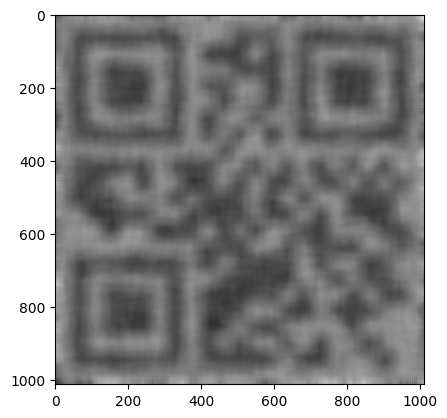

In [9]:
plt.imshow(image_11_median_sharpened, cmap='gray')

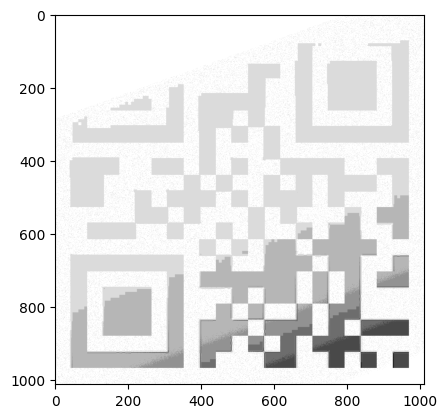

In [10]:
plt.imshow(images[9], cmap='gray')

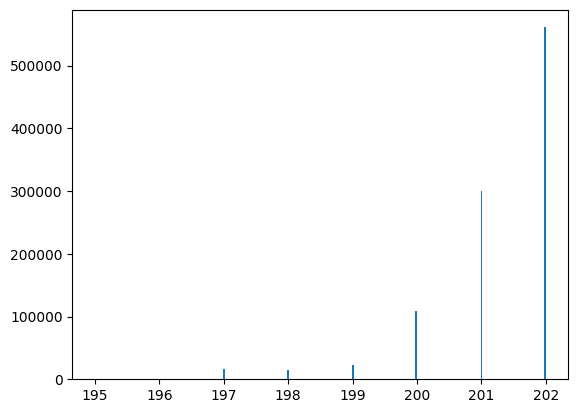

In [11]:
plt.hist(images[9].ravel(), bins=256);

In [12]:
ret, image_9_thresholded = cv2.threshold(images[9], 201,255, cv2.THRESH_BINARY)

In [13]:
image_9_thresholded

array([[255, 255, 255, ...,   0, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255,   0, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

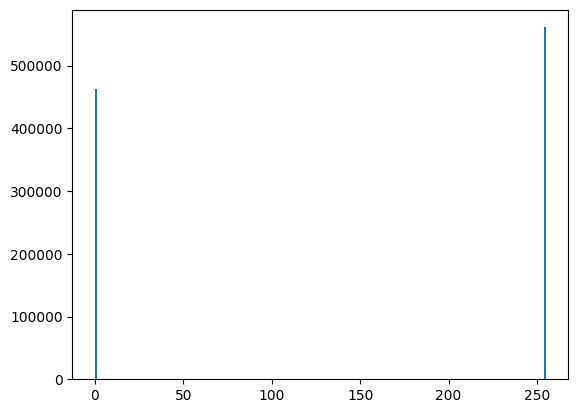

In [14]:
plt.hist(image_9_thresholded.ravel(), bins=256);

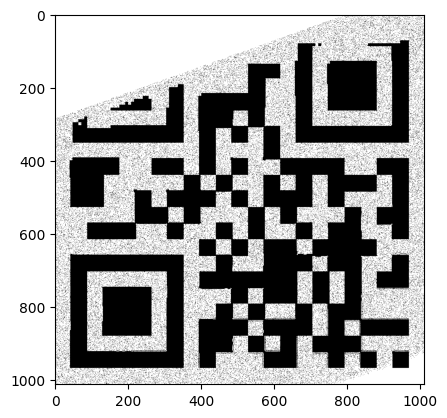

In [15]:
plt.imshow(image_9_thresholded, cmap='gray')

In [16]:
np.unique(image_9_thresholded)

array([  0, 255], dtype=uint8)

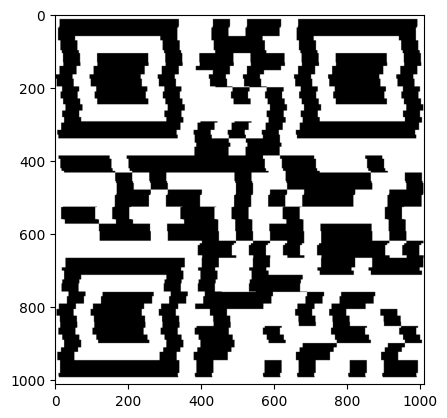

In [17]:
plt.imshow(images[4], cmap='gray')

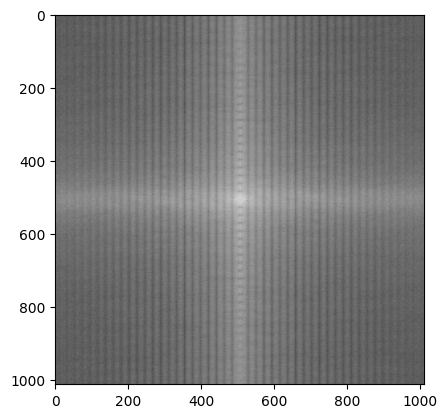

In [18]:
dft_image_4 = np.fft.fft2(images[4])
dft_image_4_shift = np.fft.fftshift(dft_image_4)
plt.imshow(np.log(np.abs(dft_image_4_shift)), cmap = 'gray');

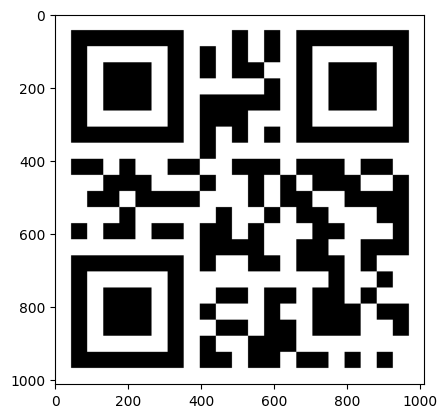

In [19]:
plt.imshow(images[0], cmap='gray')

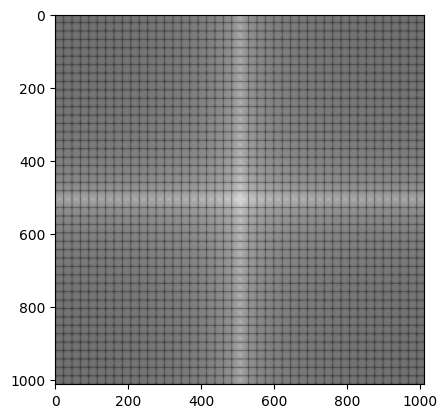

In [20]:
dft_image_0 = np.fft.fft2(images[0])
dft_image_0_shift = np.fft.fftshift(dft_image_0)
plt.imshow(np.log(np.abs(dft_image_0_shift)), cmap = 'gray');

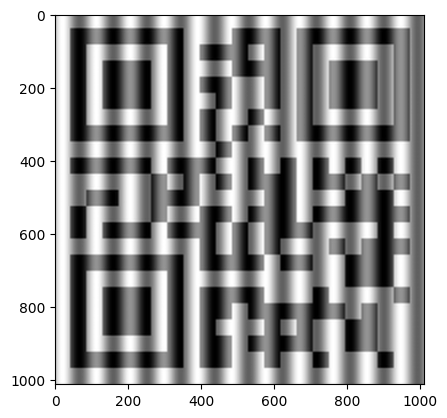

In [21]:
plt.imshow(images[10], cmap='gray')

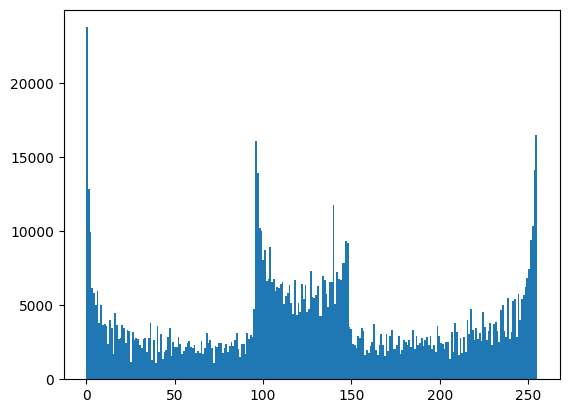

In [22]:
plt.hist(images[10].ravel(), bins=256);

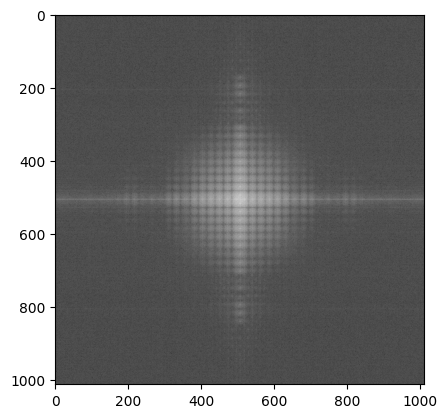

In [23]:
dft_image_with_sine = np.fft.fft2(images[10])
dft_image_with_sine_shift = np.fft.fftshift(dft_image_with_sine)
plt.imshow(np.log(np.abs(dft_image_with_sine_shift)), cmap = 'gray');

In [24]:
def dftplot(gradient_1d_slice, gradient_1d_slice_name):
    _, ax2 = plt.subplots(figsize=(20, 5), nrows=1, ncols=1)
    ax2.plot(gradient_1d_slice)
    ax2.set_title(gradient_1d_slice_name)



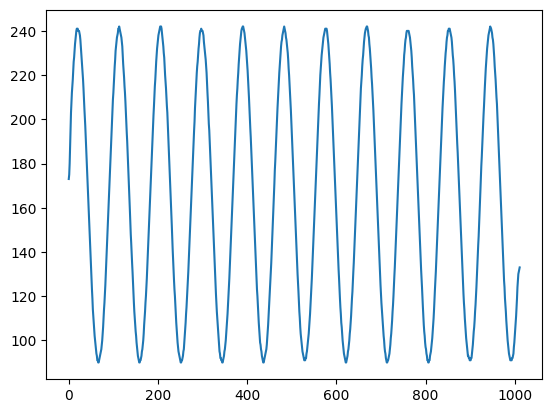

In [25]:
plt.plot(images[10][0])

In [26]:
sine_mask = np.broadcast_to(images[10][0], images[10].shape)

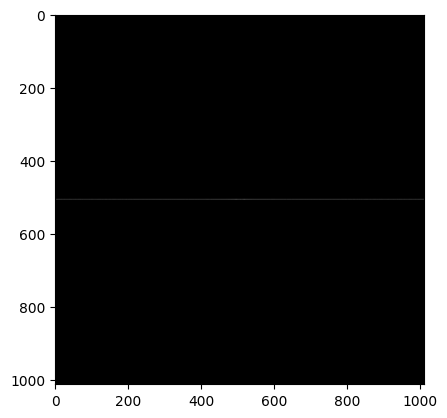

In [27]:
dft_sine_mask = np.fft.fft2(sine_mask)
dft_sine_mask_shift = np.fft.fftshift(dft_sine_mask)
plt.imshow(np.log(np.abs(dft_sine_mask_shift) + 1), cmap = 'gray')

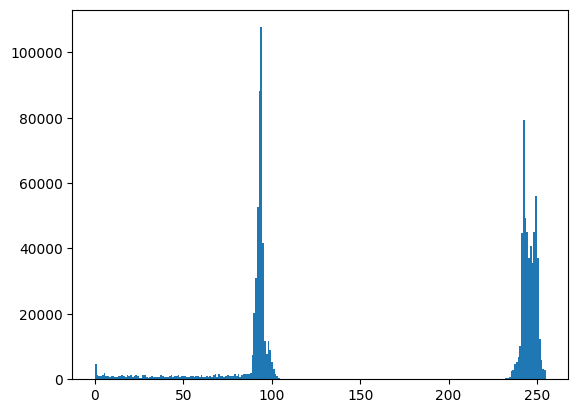

In [28]:
difference = sine_mask - images[10]
plt.hist(difference.ravel(), bins=256);

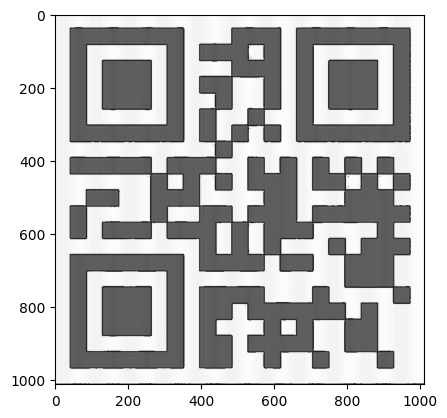

In [29]:
plt.imshow(difference, cmap='gray')

In [30]:
ret, difference_threshold = cv2.threshold(difference, 110,255, cv2.THRESH_BINARY)

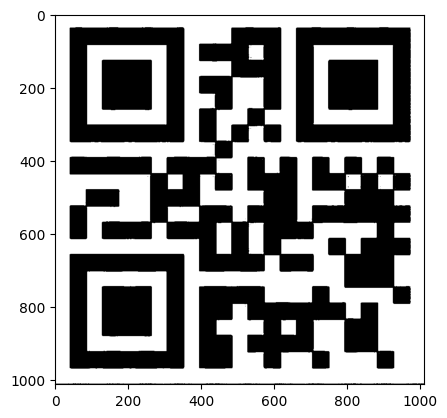

In [31]:
plt.imshow(difference_threshold, cmap='gray')

In [32]:
dft_difference_thresholded = np.fft.fft2(difference_threshold)

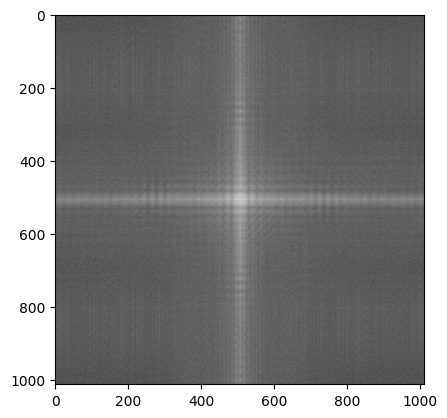

In [33]:
dft_difference_thresholded_shift = np.fft.fftshift(dft_difference_thresholded)
plt.imshow(np.log(np.abs(dft_difference_thresholded_shift)), cmap = 'gray');

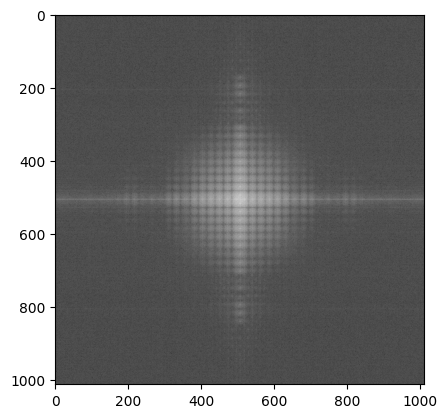

In [34]:
cleaned_sine_dft = dft_image_with_sine
cleaned_sine_dft_shift = np.fft.fftshift(cleaned_sine_dft)
# rows, cols = images[10].shape
# crow, ccol = rows//2, cols//2
# cleaned_sine_dft_shift[crow-40:crow+40, ccol-40:ccol+40] = 0
plt.imshow(np.log(np.abs(cleaned_sine_dft_shift)), cmap = 'gray');

In [35]:
def give_me_circle_mask_nowww(mask_size, radius):
    mask = np.zeros(mask_size)
    cy = mask.shape[0] // 2
    cx = mask.shape[1] // 2
    return cv2.circle(mask, (cx,cy), radius, (255,255,255), -1).astype(np.uint8)

def try_lowpass(dft_img, limit, gaussian: bool = False):
    mask = give_me_circle_mask_nowww(dft_img.shape, limit)
    if (gaussian): mask = cv2.GaussianBlur(mask, (21,21), 0)
    dft_img_shifted = np.fft.fftshift(dft_img)
    dft_img_shifted_lowpass = np.multiply(dft_img_shifted, mask)
    plot_shifted_fft_and_ifft(dft_img_shifted_lowpass)
    

def try_highpass(dft_img, limit, gaussian: bool = False, keep_dc: bool = False):
    mask = ~give_me_circle_mask_nowww(dft_img.shape, limit)
    if (gaussian): mask = cv2.GaussianBlur(mask, (61,61), 0)
    if (keep_dc): mask[dft_img.shape[0]//2, dft_img.shape[1]//2] = 255
    dft_img_shifted = np.fft.fftshift(dft_img)
    dft_img_shifted_highpass = np.multiply(dft_img_shifted, mask)
    return plot_shifted_fft_and_ifft(dft_img_shifted_highpass)

def plot_shifted_fft_and_ifft(dft_img_shifted):
    img = np.fft.ifft2(np.fft.ifftshift(dft_img_shifted))
    fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)
    ax1.set(yticks=[0, img.shape[0]//2, img.shape[0] - 1], yticklabels=[-img.shape[0]//2, 0, img.shape[0]//2 - 1]);
    ax1.set(xticks=[0, img.shape[1]//2, img.shape[1] - 1], xticklabels=[-img.shape[1]//2, 0, img.shape[1]//2 - 1]);
    ax1.imshow(np.abs(dft_img_shifted)**0.1, cmap = 'gray');
    img = np.abs(img)*0.001
    ax2.imshow(img, cmap = 'gray')
    return img

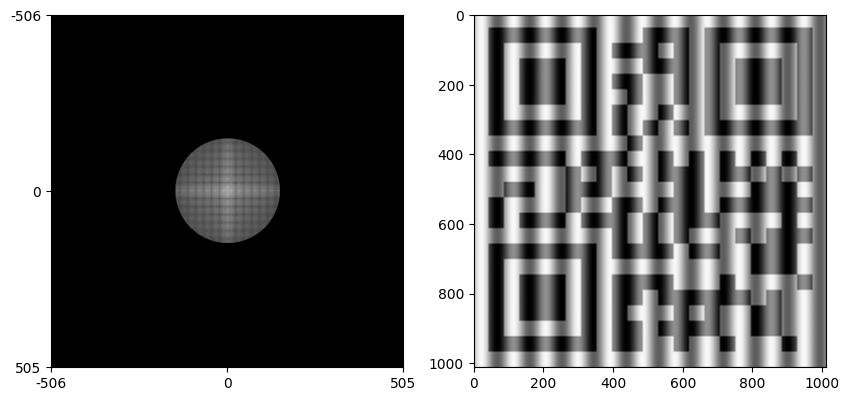

In [52]:
image_back = try_lowpass(cleaned_sine_dft, 150, gaussian=False)

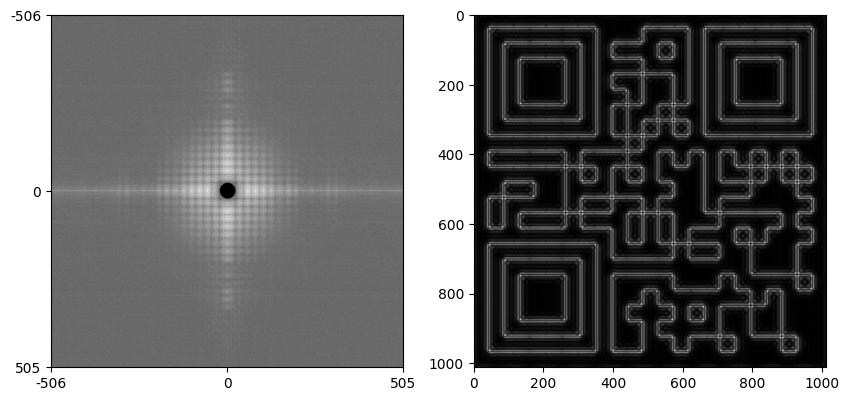

In [37]:
image_back = try_highpass(cleaned_sine_dft, 50, gaussian=True, keep_dc=False)

In [38]:
image_back.max()

13.62027910129086

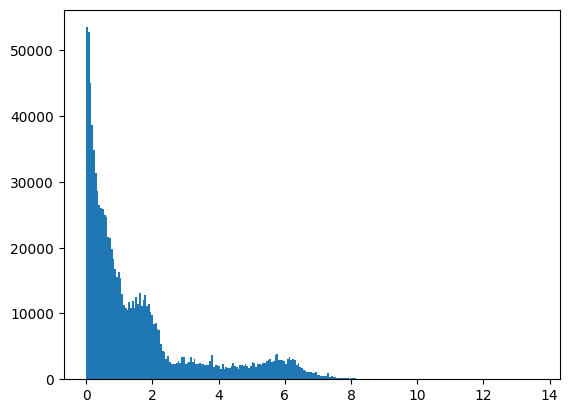

In [39]:
plt.hist(image_back.ravel(), bins=256);

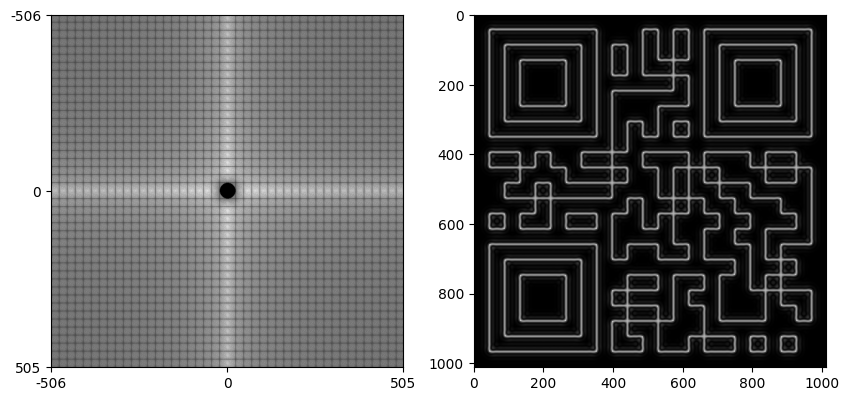

In [40]:
image_0_back = try_highpass(dft_image_0, 50, gaussian=True, keep_dc=False)

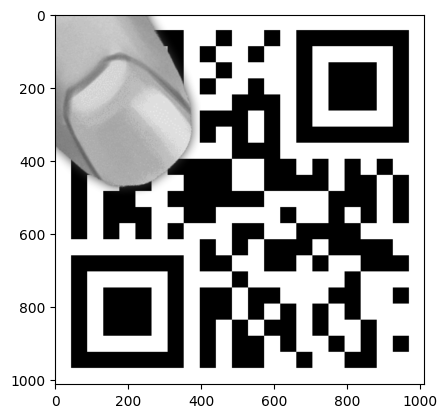

In [41]:
plt.imshow(images[6], cmap='gray')

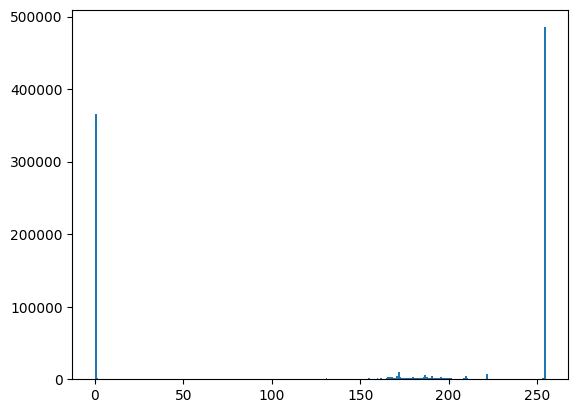

In [42]:
plt.hist(images[6].ravel(), bins=256);

In [43]:
ret, image_6_thresholded = cv2.threshold(images[6],95,255, cv2.THRESH_BINARY)

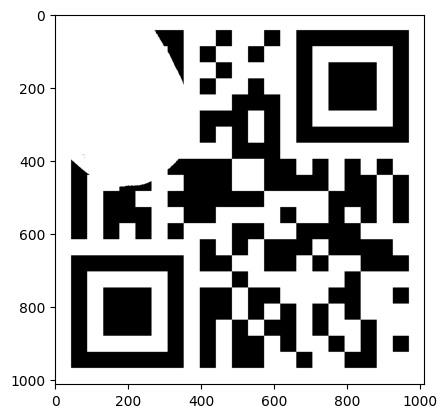

In [44]:
plt.imshow(image_6_thresholded, cmap='gray')

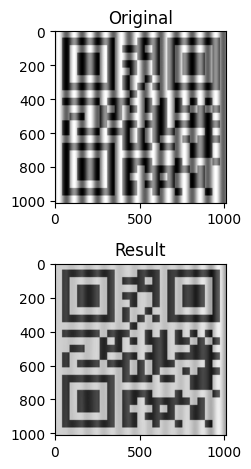

In [45]:
def notch_reject_filter(shape, d0=9, u_k=0, v_k=0):
    P, Q = shape
    # Initialize filter with zeros
    H = np.zeros((P, Q))

    # Traverse through filter
    for u in range(0, P):
        for v in range(0, Q):
            # Get euclidean distance from point D(u,v) to the center
            D_uv = np.sqrt((u - P / 2 + u_k) ** 2 + (v - Q / 2 + v_k) ** 2)
            D_muv = np.sqrt((u - P / 2 - u_k) ** 2 + (v - Q / 2 - v_k) ** 2)

            if D_uv <= d0 or D_muv <= d0:
                H[u, v] = 0.0
            else:
                H[u, v] = 1.0

    return H


img = images[10]

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
phase_spectrumR = np.angle(fshift)
magnitude_spectrum = np.log(np.abs(fshift))

img_shape = img.shape

H1 = notch_reject_filter(img_shape, 1, 0, 10)

NotchRejectCenter = fshift * H1
NotchReject = np.fft.ifftshift(NotchRejectCenter)
inverse_NotchReject = np.fft.ifft2(NotchReject)  # Compute the inverse DFT of the result


Result = np.abs(inverse_NotchReject)

plt.subplot(222)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(224)
plt.imshow(Result, "gray") 
plt.title("Result")


plt.tight_layout()
plt.show()

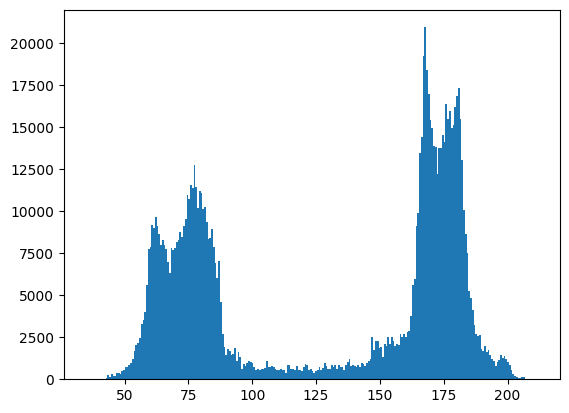

In [46]:
plt.hist(Result.ravel(), bins=256);

In [47]:
_, image_

NameError: name 'image_' is not defined

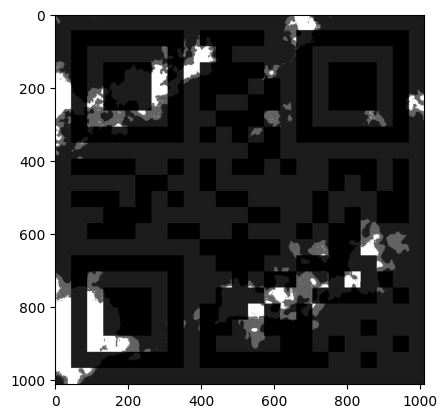

In [ ]:
plt.imshow(images[12], cmap='gray')

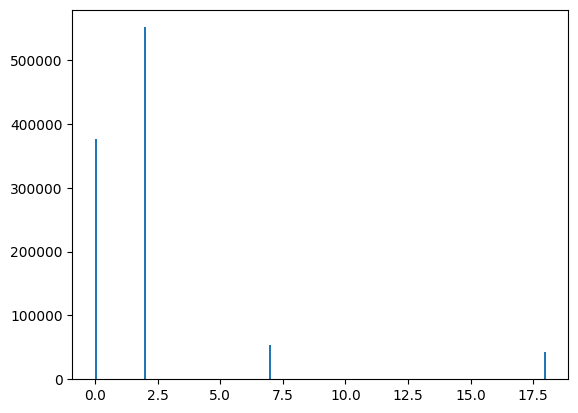

In [ ]:
plt.hist(images[12].ravel(), bins=256);

In [ ]:
image_12_equalized = cv2.equalizeHist(images[12])

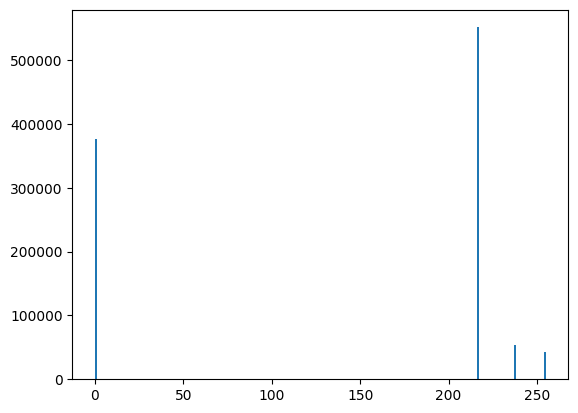

In [ ]:
plt.hist(image_12_equalized.ravel(), bins=256);

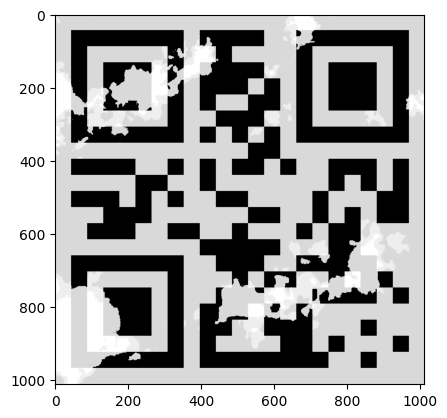

In [ ]:
plt.imshow(image_12_equalized, cmap='gray')

In [ ]:
# ret, image_12_thresholded = cv2.threshold(images[12], 1, 255, cv2.THRESH_BINARY)
# image_12_thresholded = cv2.adaptiveThreshold(images[12], 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
#                                                   cv2.THRESH_BINARY,3,2)
image_12_thresholded = cv2.adaptiveThreshold(image_12_equalized, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,141,1)


In [ ]:
np.unique(images[12])

array([ 0,  2,  7, 18], dtype=uint8)

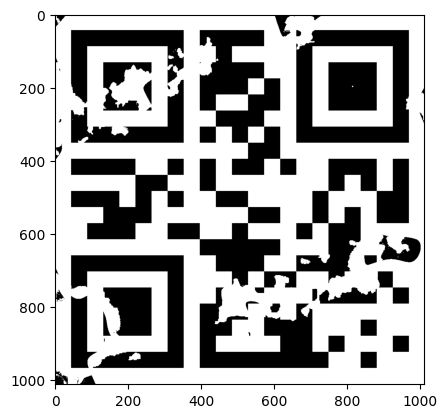

In [ ]:
plt.imshow(image_12_thresholded, cmap='gray')

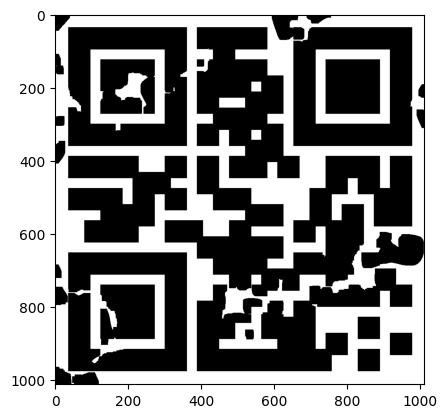

In [ ]:
se_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
# opening_12 = cv2.morphologyEx(image_12_thresholded, cv2.MORPH_OPEN, se_rect)
closing_12 = cv2.morphologyEx(image_12_thresholded, cv2.MORPH_CLOSE, se_rect)
opening_12 = cv2.morphologyEx(closing_12, cv2.MORPH_OPEN, se_rect)

erosion = cv2.erode(image_12_thresholded, se_rect,iterations = 1)

plt.imshow(erosion, cmap='gray')

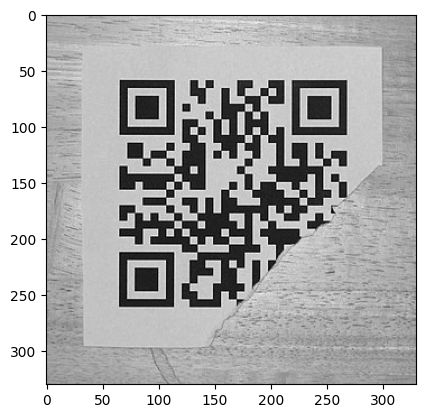

In [ ]:
plt.imshow(images[14], cmap='gray')

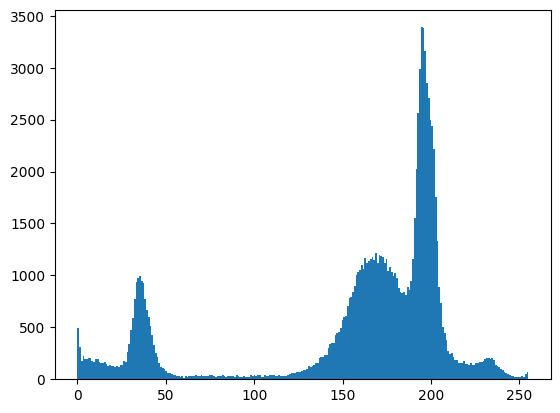

In [ ]:
plt.hist(images[14].ravel(), bins=256);

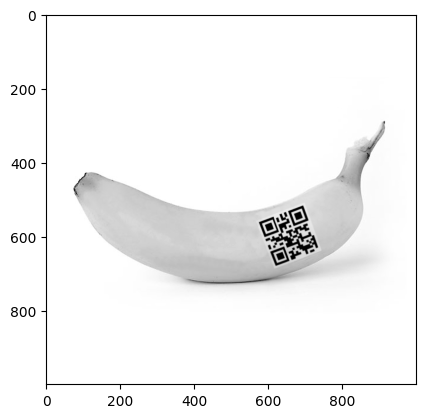

In [ ]:
plt.imshow(images[13], cmap='gray')

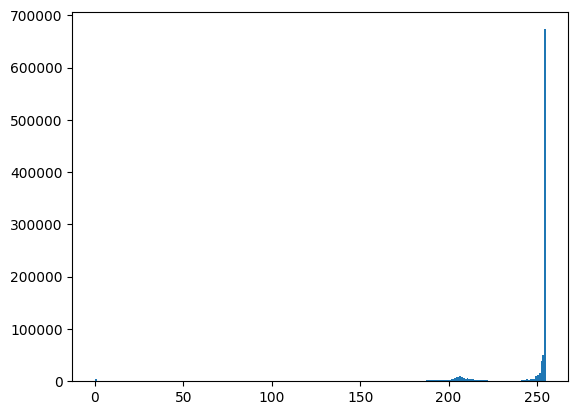

In [ ]:
plt.hist(images[13].ravel(), bins=256);

In [ ]:
ret, image_13_thresholded = cv2.threshold(images[13], 95, 255, cv2.THRESH_BINARY)

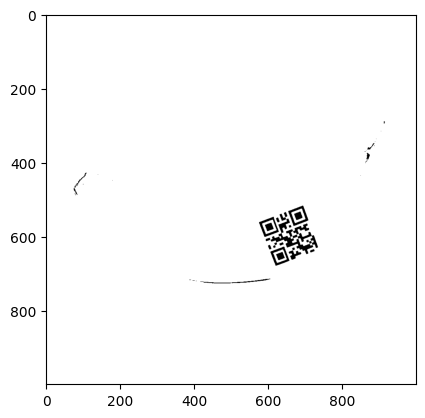

In [ ]:
plt.imshow(image_13_thresholded, cmap='gray')

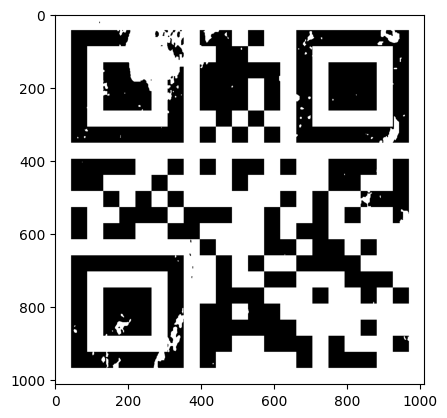

In [ ]:
plt.imshow(images[7], cmap='gray')

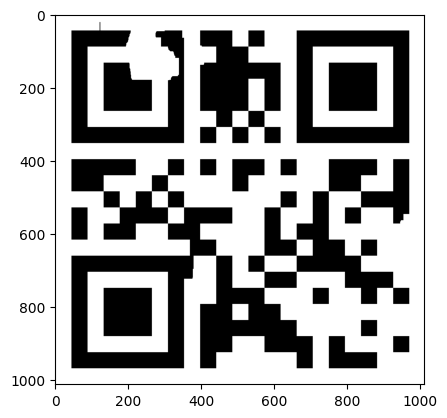

In [ ]:
se_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 40))
closing_7 = cv2.morphologyEx(images[7], cv2.MORPH_CLOSE, se_rect)
opening_7 = cv2.morphologyEx(images[7], cv2.MORPH_OPEN, se_rect)

plt.imshow(opening_7, cmap='gray')

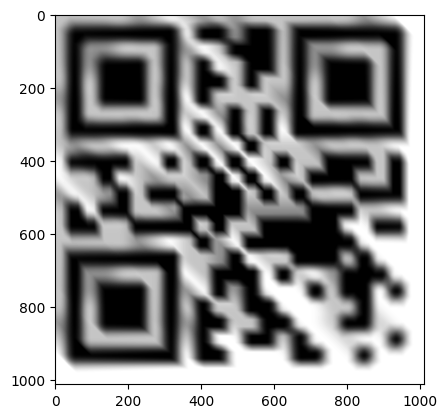

In [ ]:
plt.imshow(images[8], cmap='gray')

In [ ]:
image_8_sharpen = cv2.filter2D(images[8], -1, np.array([[0,1,0],
                                                        [1,-3,1],
                                                        [0,1,0]]))

In [ ]:
sharpened_image = image_8_sharpen
for _ in range(2):
    sharpened_image = cv2.filter2D(sharpened_image, -1, np.array([[0,1,0],
                                                        [1,-3,1],
                                                        [0,1,0]]))

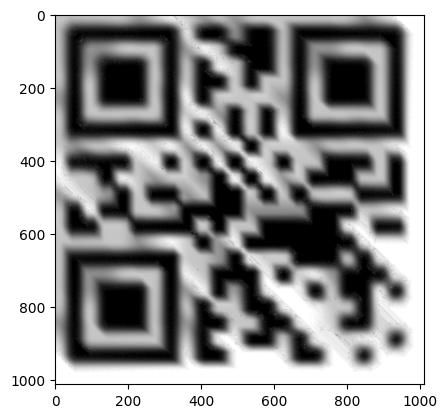

In [ ]:
plt.imshow(sharpened_image, cmap='gray')

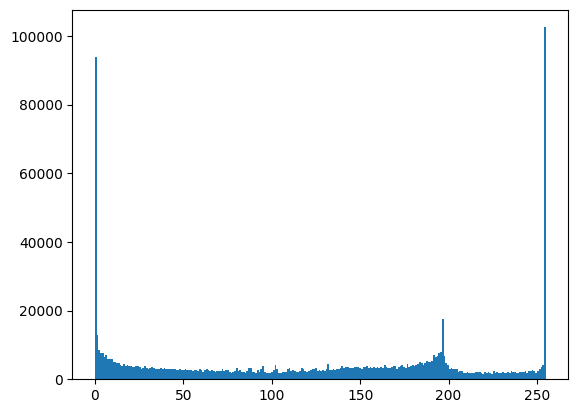

In [ ]:
plt.hist(images[8].ravel(), bins=256);

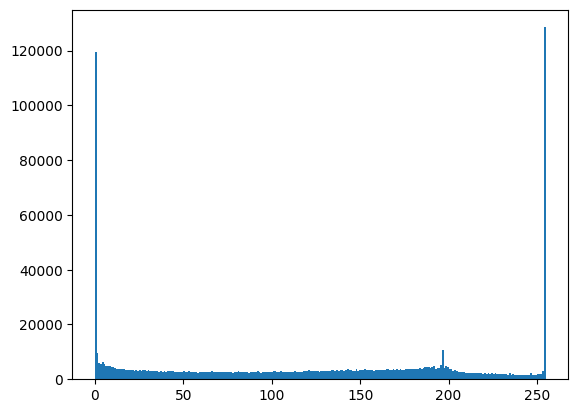

In [ ]:
plt.hist(sharpened_image.ravel(), bins=256);

In [ ]:
ret, image_8_thresholded = cv2.threshold(images[8], 95, 255, cv2.THRESH_BINARY)

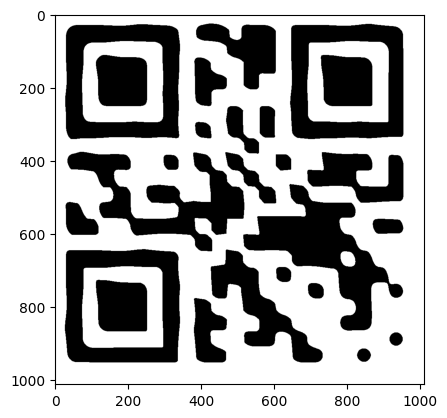

In [ ]:
plt.imshow(image_8_thresholded, cmap='gray')

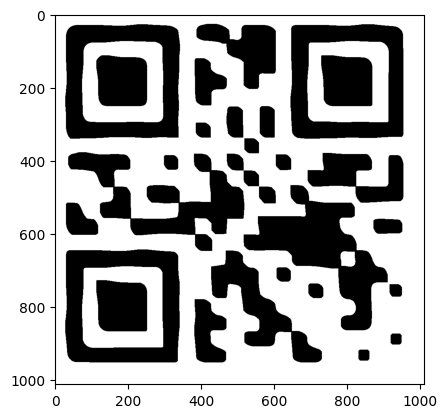

In [ ]:
se_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))
closing = cv2.morphologyEx(image_8_thresholded, cv2.MORPH_CLOSE, se_rect)
plt.imshow(closing, cmap='gray')